In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from imblearn.over_sampling import SMOTE

In [2]:
#2(b)
trainset=pd.read_csv('aps_failure_training_set.csv',index_col=None,skiprows=20)
testset=pd.read_csv('aps_failure_test_set.csv',index_col=None,skiprows=20)
temp_class_tr=trainset.iloc[:,0]


In [3]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [5]:
trainset = trainset.replace("na",np.nan)

In [6]:
transformed_values_tr=imp_mean.fit_transform(trainset.iloc[:,1:])
tr_header=list(trainset)


In [7]:
trainset=pd.DataFrame(transformed_values_tr,columns=tr_header[1:])
trainset=pd.concat([trainset,temp_class_tr],axis=1)

In [8]:
temp_class_test=testset.iloc[:,0]
testset=testset.replace('na',np.nan)
transformed_values_test=imp_mean.fit_transform(testset.iloc[:,1:])
test_header=list(testset)

In [9]:
testset=pd.DataFrame(transformed_values_test,columns=test_header[1:])
testset=pd.concat([testset,temp_class_test],axis=1)


In [10]:
trainset_copy=trainset.copy()
testset_copy=testset.copy()

In [11]:
var_train=variation(trainset.iloc[:,:-1],axis=0)
print(var_train)

[  2.45091715   2.32838058   2.16974844 183.8460883   23.19074341
  18.6587656   91.87779897  34.85465962  17.36899866   8.54997778
   5.40143368   2.92706769   2.34490753   2.83346048   6.15453179
  32.98407617   2.30016808  18.01253164  43.80145737  74.5260669
   9.0742952    9.05859612   2.23877812   2.26013028   3.05913881
   2.83958803  10.83695939  86.4161837   23.45922929  68.15998601
   5.77873675   3.87753603  37.00925391  52.23341648  38.80925699
  28.41330475  33.37443788  12.38403755   3.02306245   3.28421469
   3.77561604  83.78536479   9.32826675   7.6463558   13.14158342
   7.44591379   2.81711666   3.00804943   8.78083868  16.04744938
  22.42558271  76.96733666   2.68305412   2.60870996   2.87873171
   2.7160934    2.61599931   2.67985343   3.00724764   2.81034518
   6.75148907   9.32142229   2.39229943   6.94077979   5.1226311
   6.59664885   7.14856756   2.29781659   2.61276291   3.00252249
   3.55062182   0.73137228   0.73356539   0.59472087   0.51705631
   0.4625598

In [12]:
var_test=variation(testset.iloc[:,:-1],axis=0)
print(var_test)

[  7.40502284   1.59870303   2.1597436    3.05915923  17.9838153
  16.0464513   53.08869824  42.98327275  16.99752789   9.05402911
   5.66288381   3.08054074   2.37913682   2.73434648   6.69882817
  29.45403239   2.36272981  19.16541062  40.89005294  93.71043811
   9.10995685   8.9871512    2.30211109   2.32546601   3.16565349
   2.89236313   9.39761382  82.36046603  22.2444046   84.53109006
   5.55559025   3.79139835  39.82036451  41.34849063  36.70293614
  28.01012644  30.40932352   8.79285989   3.01735978   3.12467346
   4.38490886  45.08805311   7.82943241   6.39156486   6.29684258
   7.97488344   2.90707713   3.25001983   8.42624043  13.16400594
  21.80430506  59.66826905   2.7042687    2.77180683   2.9105815
   2.77155293   2.71933182   2.77850393   2.95889008   2.86269021
   6.53816942   9.97129603   2.46406669   5.6528581    4.94992361
   5.4236913    6.71981731   2.36137941   2.65988797   3.03581173
   3.65729725   0.72558963   0.72778219   0.59260053   0.51962727
   0.4641013

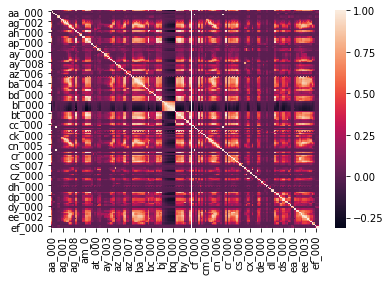

In [13]:
corr_tr=sns.heatmap(trainset.corr()) #plotting correlation matrix for trainset

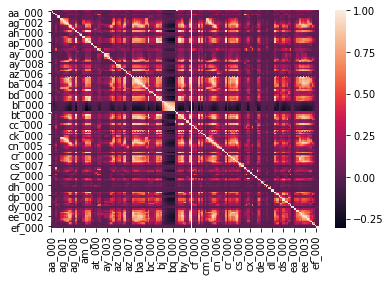

In [14]:
corr_test=sns.heatmap(testset.corr())   #plotting correlation matrix for testset

In [15]:
feat_cv_tr=list(zip(trainset.columns,var_train))
feat_cv_test=list(zip(testset.columns,var_test))

In [16]:
feat_highest_cv_tr=sorted(feat_cv_tr,key=itemgetter(1),reverse=True)[:13]
feat_highest_cv_test=sorted(feat_cv_test,key=itemgetter(1),reverse=True)[:13]

dictionary_tr=dict()
dictionary_test=dict()

for k,v in feat_highest_cv_tr:
    dictionary_tr[k]=v
for k,v in feat_highest_cv_test:
    dictionary_test[k]=v

feat_highest_cv_tr_df=pd.DataFrame(dictionary_tr,index=[0])
feat_highest_cv_test_df=pd.DataFrame(dictionary_test,index=[0])

In [17]:
temp_df_tr=pd.DataFrame()
for column in trainset.columns:
    for k in dictionary_tr.keys():
        if column==k:
            temp_df1_tr=trainset.filter([column],axis=1)
            temp_df_tr=pd.concat([temp_df1_tr,temp_df_tr],axis=1)


    

In [18]:
temp_df_tr

,dj_000,dh_000,cs_009,co_000,ch_000,cf_000,az_009,ay_009,au_000,as_000,ak_000,ag_000,ad_000
0,0.000000,0.000000,0.0,220.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,280.000000
1,0.000000,0.000000,0.0,190515.566938,0.000443,190221.810984,0.0,0.0,0.0,0.0,0.000000,0.0,190620.639314
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,100.000000
3,0.000000,0.000000,0.0,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,66.000000
4,0.000000,0.000000,0.0,202.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,458.000000
5,0.000000,0.000000,0.0,2.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,218.000000
6,0.000000,0.000000,0.0,190515.566938,0.000443,190221.810984,0.0,0.0,0.0,0.0,0.000000,0.0,190620.639314
7,0.000000,0.000000,0.0,6.000000,0.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.0,116.000000
8,0.000000,0.000000,0.0,190515.566938,0.000443,190221.810984,2.0,0.0,0.0,0.0,0.000000,0.0,190620.639314
9,0.000000,55760.000000,0.0,190515.566938,0.000443,190221.810984,0.0,0.0,0.0,0.0,0.000000,0.0,190620.639314


In [19]:
temp_df_test=pd.DataFrame()
for column in testset.columns:
    for k in dictionary_test.keys():
        if column==k:
            temp_df1_test=testset.filter([column],axis=1)
            temp_df_test=pd.concat([temp_df1_test,temp_df_test],axis=1)

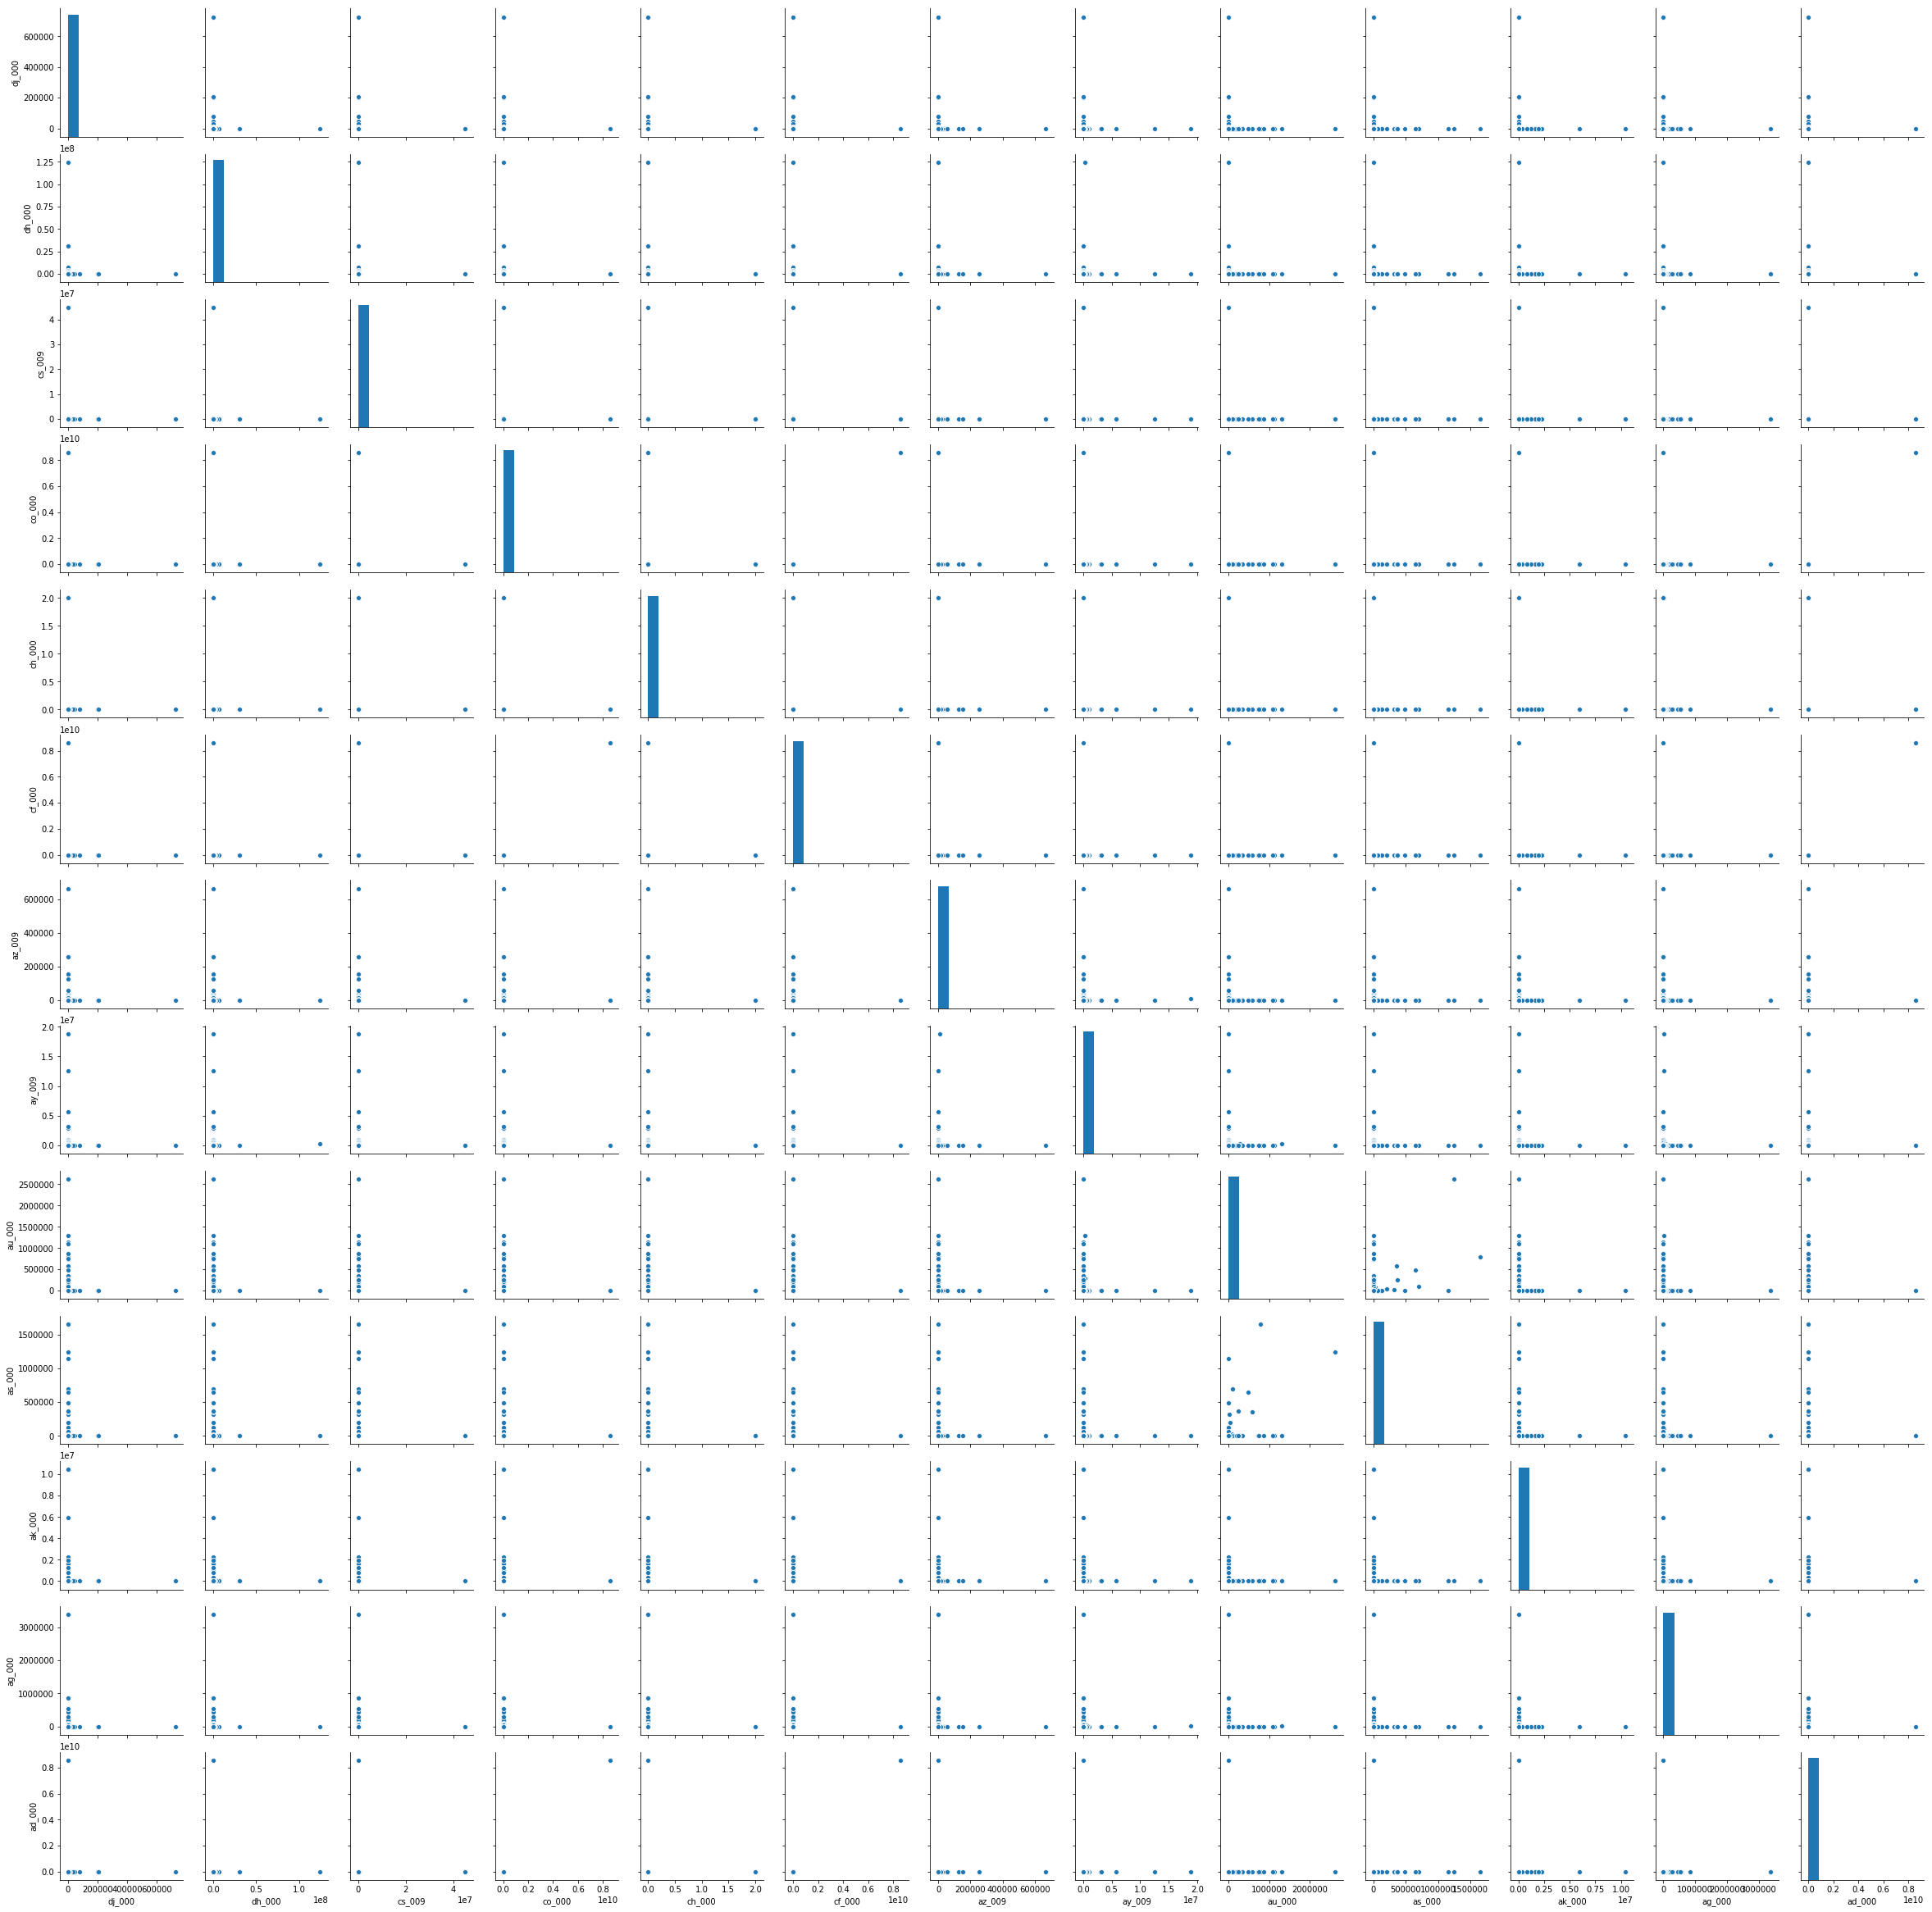

In [21]:
plot_train=sns.pairplot(temp_df_tr)


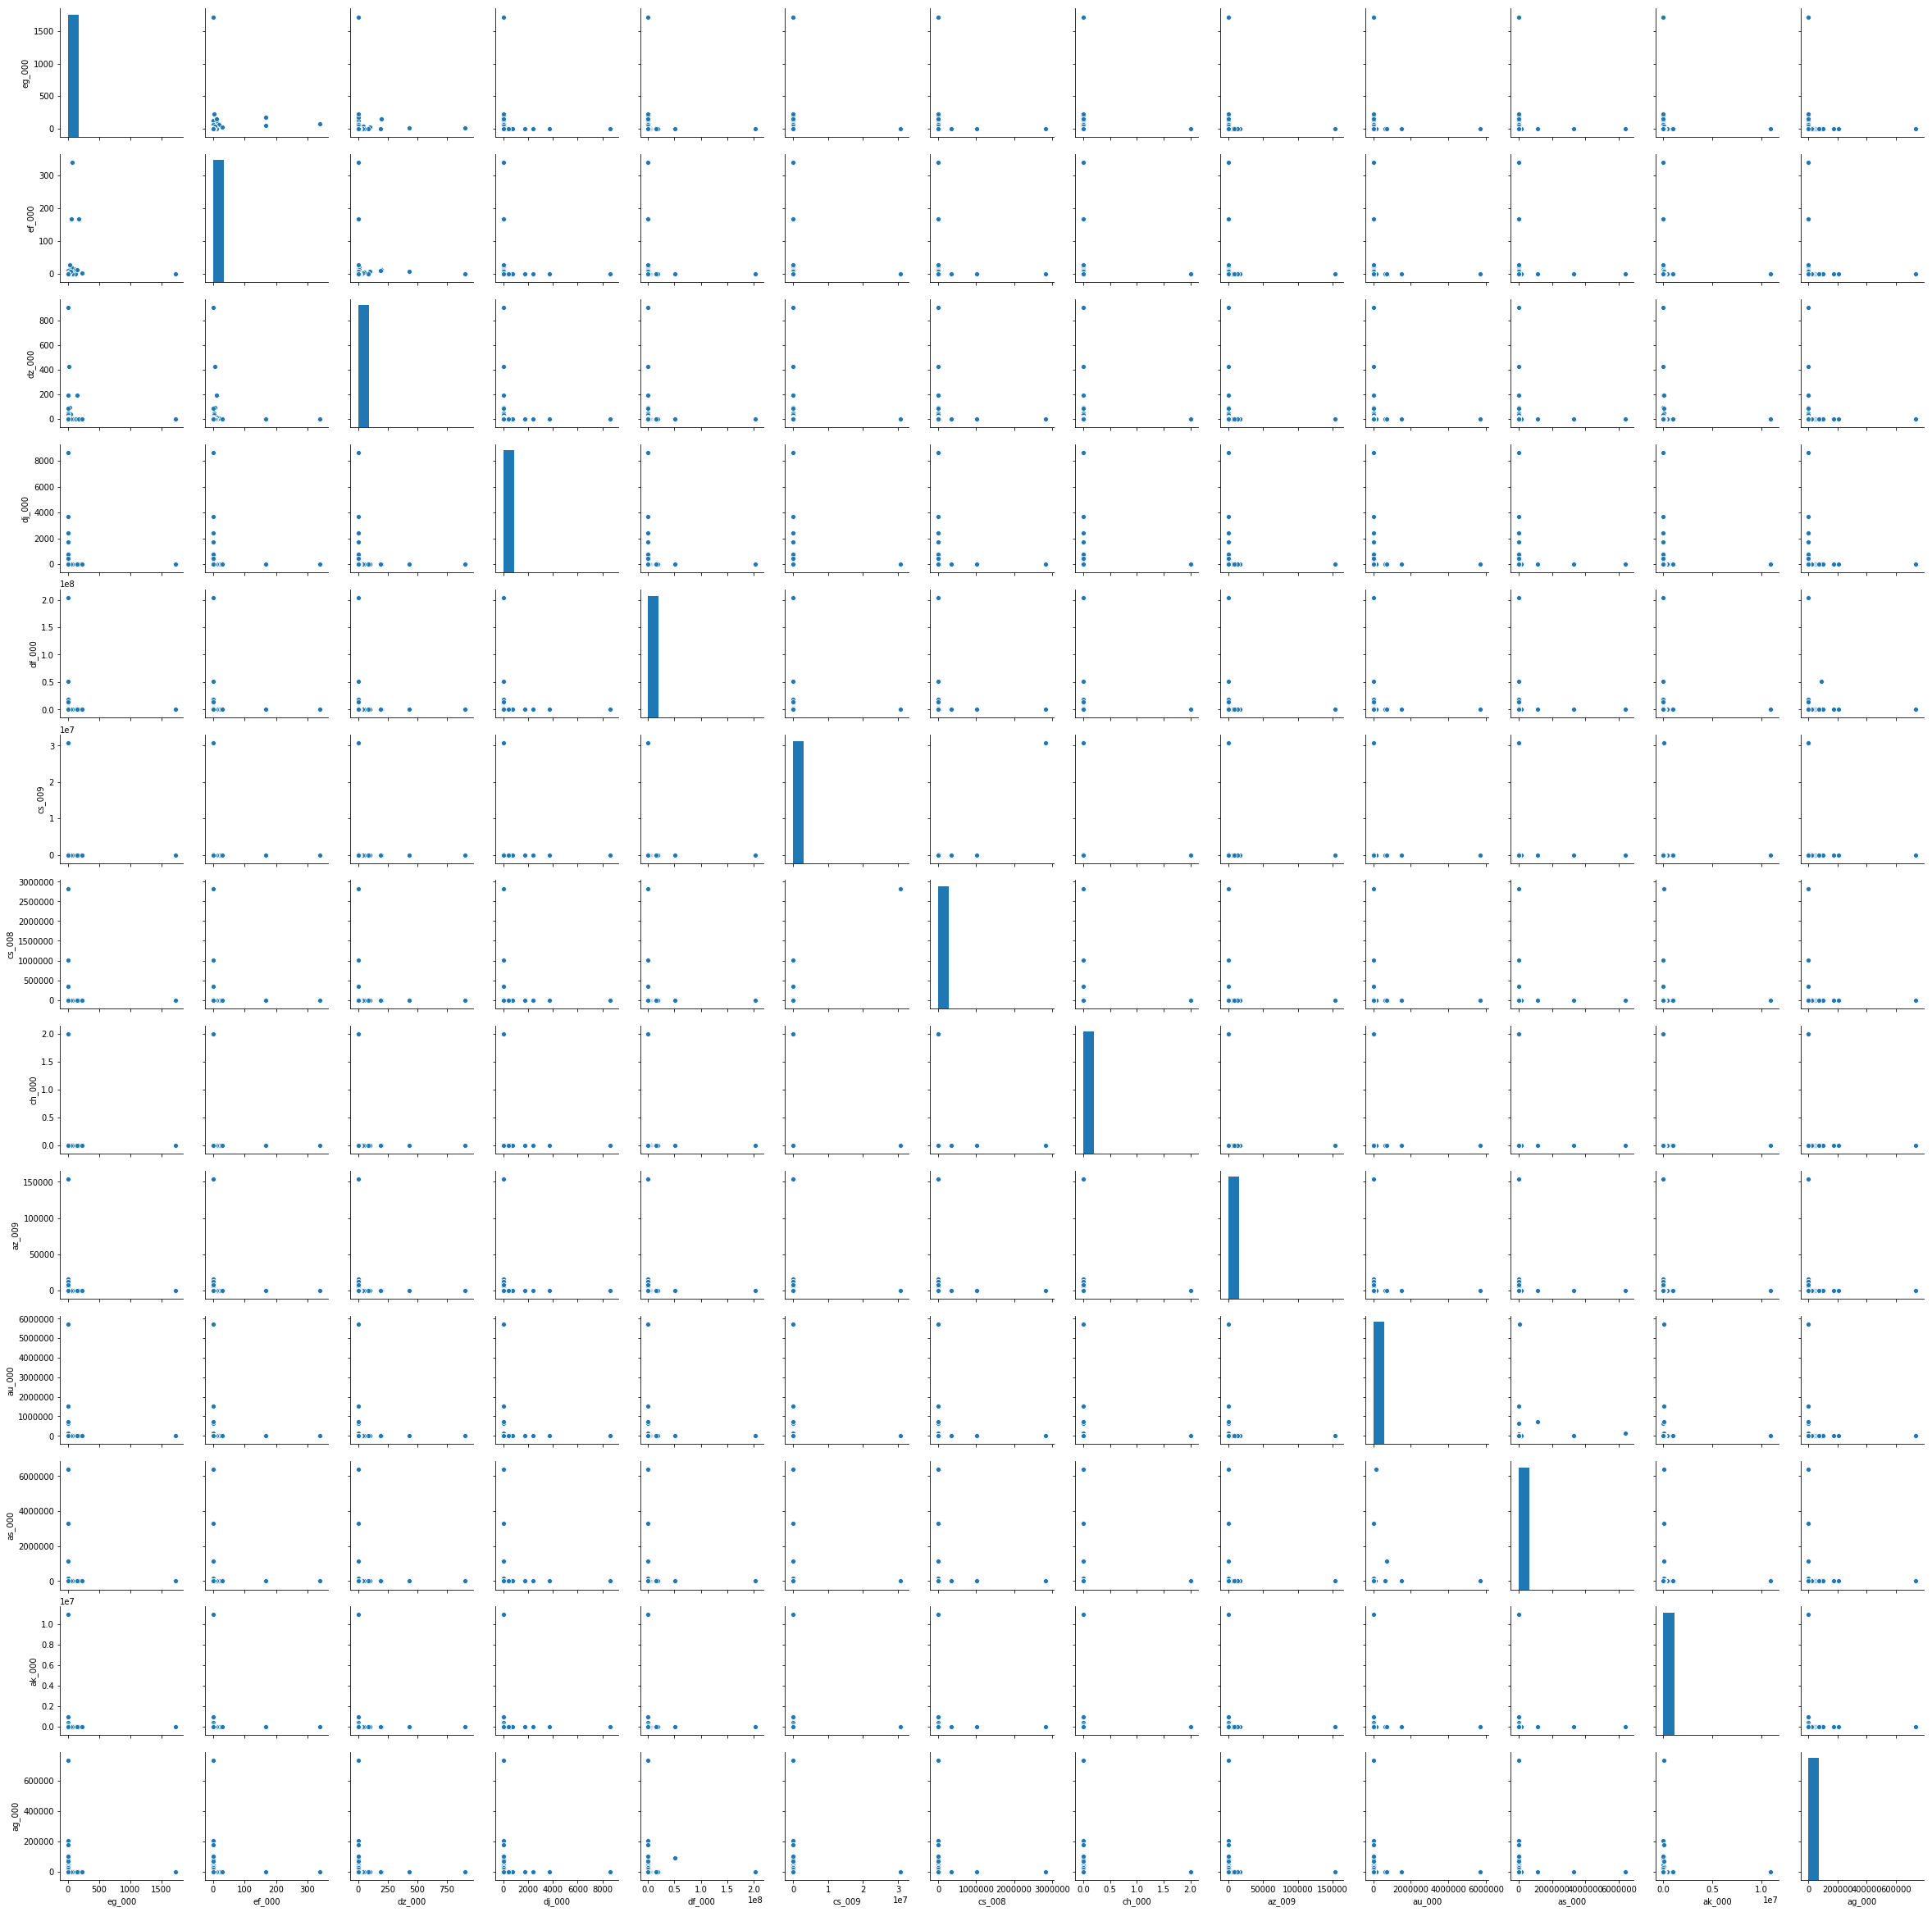

In [22]:
plot_test=sns.pairplot(temp_df_test)


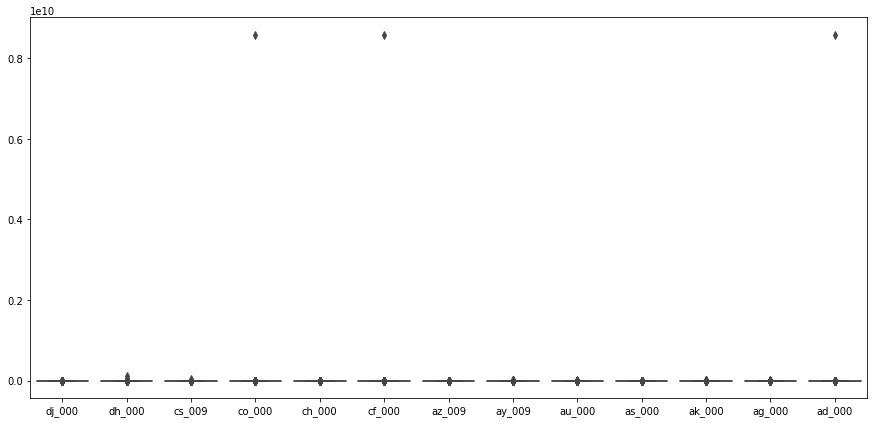

In [23]:
plt.figure(figsize=(15,7))
boxplot_train=sns.boxplot(data=temp_df_tr)

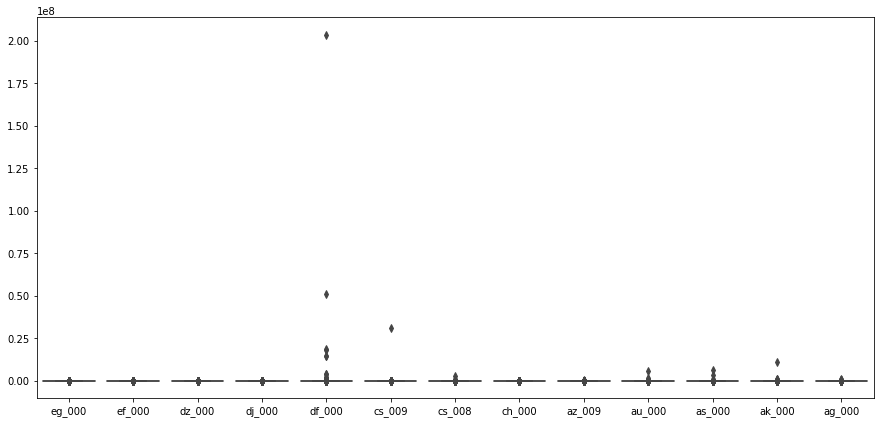

In [24]:
plt.figure(figsize=(15,7))
boxplot_test=sns.boxplot(data=temp_df_test)

In [25]:
trainset.groupby('class').count()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,,,,,,,,,,,,,,,,,,,,,
neg,59000,59000,59000,59000,59000,59000,59000,59000,59000,59000,...,59000,59000,59000,59000,59000,59000,59000,59000,59000,59000
pos,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [28]:
trainset['Class'] = trainset['class'].map({'neg': 0, 'pos': 1})
testset['Class']=testset['class'].map({'neg': 0, 'pos': 1})

In [29]:
trainset.drop(['class'],axis='columns',inplace=True)
testset.drop(['class'],axis='columns',inplace=True)

In [30]:
X_tree_train=trainset.iloc[:,:-1]
y_tree_train=trainset.iloc[:,-1]
X_tree_test=testset.iloc[:,:-1]
y_tree_test=testset.iloc[:,-1]
X_tree_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.682000e+03,...,1.098000e+03,1.380000e+02,4.120000e+02,6.540000e+02,7.800000e+01,8.800000e+01,0.000000e+00,0.000000,0.000000,0.000000
1,82.0,0.000000,6.800000e+01,40.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.068000e+03,2.760000e+02,1.620000e+03,1.160000e+02,8.600000e+01,4.620000e+02,0.000000e+00,0.000000,0.000000,0.000000
2,66002.0,2.000000,2.120000e+02,112.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.994860e+05,...,4.950760e+05,3.803680e+05,4.401340e+05,2.695560e+05,1.315022e+06,1.536800e+05,5.160000e+02,0.000000,0.000000,0.000000
3,59816.0,0.772065,1.010000e+03,936.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,5.408200e+05,2.432700e+05,4.833020e+05,4.853320e+05,4.313760e+05,2.100740e+05,2.816620e+05,3232.000000,0.000000,0.000000
4,1814.0,0.772065,1.560000e+02,140.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,7.646000e+03,4.144000e+03,1.846600e+04,4.978200e+04,3.176000e+03,4.820000e+02,7.600000e+01,0.000000,0.000000,0.000000
5,174.0,0.772065,2.600000e+01,24.000000,0.000000,0.00000,120.858516,2064.203656,13792.360509,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8560.354884,0.000000,0.000000
6,40202.0,0.772065,6.400000e+02,606.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,5.262180e+05,2.397340e+05,4.395560e+05,3.742480e+05,1.690960e+05,5.365800e+04,4.105400e+04,320.000000,0.000000,0.000000
7,120278.0,0.772065,2.130706e+09,256.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.006722e+06,4.596580e+05,8.763560e+05,6.895320e+05,5.685400e+05,5.006240e+05,1.006628e+06,34820.000000,0.000000,0.000000
8,14592.0,0.000000,2.130706e+09,162.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.050240e+05,5.739800e+04,4.915200e+04,3.825600e+04,2.432680e+05,1.451440e+05,0.000000e+00,0.000000,0.000000,0.000000
9,28338.0,0.772065,2.130706e+09,238.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,3.570060e+05,1.500560e+05,2.647760e+05,2.392820e+05,1.405480e+05,7.475000e+04,3.295800e+04,84.000000,0.000000,0.000000


In [31]:
clf_rf=RandomForestClassifier(n_estimators=100,oob_score=True)
clf_rf=clf_rf.fit(X_tree_train,y_tree_train)
y_pred_tr_rf=clf_rf.predict(X_tree_train)
y_pred_test_rf=clf_rf.predict(X_tree_test)

In [32]:
print(confusion_matrix(y_tree_train,y_pred_tr_rf)) #confusion matrix for train set

[[59000     0]
 [    0  1000]]


In [33]:
print(confusion_matrix(y_tree_test,y_pred_test_rf)) #confusion matrix for test set


[[15608    17]
 [  108   267]]


In [36]:
trainerror_rf=mean_squared_error(y_pred_tr_rf,y_tree_train)
print(trainerror_rf)

0.0


In [37]:
testerror_rf=mean_squared_error(y_pred_test_rf,y_tree_test)
print(testerror_rf)

0.0078125


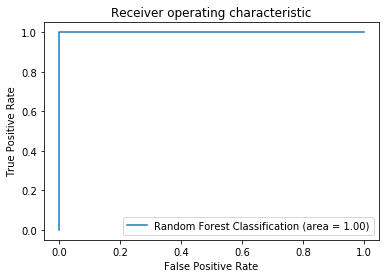

1.0


In [38]:
rf_roc_auc_train = roc_auc_score(y_tree_train,y_pred_tr_rf)
fpr_tr, tpr_tr, thresholds_tr= roc_curve(y_tree_train,y_pred_tr_rf)
plt.figure()
plt.plot(fpr_tr, tpr_tr, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_trainset')
plt.show()
print(rf_roc_auc_train)

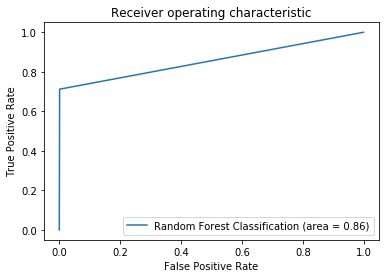

0.855456


In [39]:
rf_roc_auc_test = roc_auc_score(y_tree_test,y_pred_test_rf)
fpr_test, tpr_test, thresholds_test= roc_curve(y_tree_test,y_pred_test_rf)
plt.figure()
plt.plot(fpr_test, tpr_test, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_testset')
plt.show()
print(rf_roc_auc_test)

In [40]:
print('Out of Bag error: ',clf_rf.oob_score_)

Out of Bag error:  0.9938833333333333


In [41]:
clf_rf_imb=RandomForestClassifier(n_estimators=100,oob_score=True,class_weight="balanced")
clf_rf_imb=clf_rf_imb.fit(X_tree_train,y_tree_train)
y_pred_tr_rf_imb=clf_rf_imb.predict(X_tree_train)
y_pred_test_rf_imb=clf_rf_imb.predict(X_tree_test)

In [42]:
print(confusion_matrix(y_tree_train,y_pred_tr_rf_imb)) #confusion matrix for train set

[[59000     0]
 [    0  1000]]


In [43]:
print(confusion_matrix(y_tree_test,y_pred_test_rf_imb)) #confusion matrix for test set

[[15610    15]
 [  165   210]]


In [44]:
trainerror_rf_imb=mean_squared_error(y_pred_tr_rf_imb,y_tree_train)
print(trainerror_rf_imb)

0.0


In [45]:
testerror_rf_imb=mean_squared_error(y_pred_test_rf_imb,y_tree_test)
print(testerror_rf_imb)

0.01125


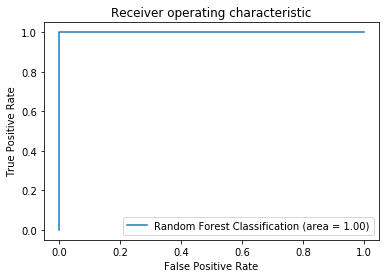

1.0


In [46]:
rf_roc_auc_train_imb = roc_auc_score(y_tree_train,y_pred_tr_rf_imb)
fpr_tr_imb, tpr_tr_imb, thresholds_tr_imb= roc_curve(y_tree_train,y_pred_tr_rf_imb)
plt.figure()
plt.plot(fpr_tr_imb, tpr_tr_imb, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_train_imb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_trainset_imb')
plt.show()
print(rf_roc_auc_train_imb)

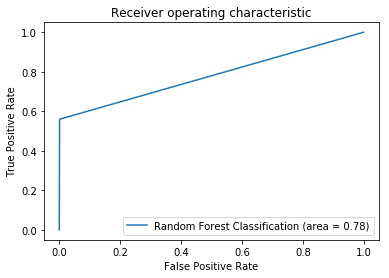

0.77952


In [47]:
rf_roc_auc_test_imb = roc_auc_score(y_tree_test,y_pred_test_rf_imb)
fpr_test_imb, tpr_test_imb, thresholds_test_imb= roc_curve(y_tree_test,y_pred_test_rf_imb)
plt.figure()
plt.plot(fpr_test_imb, tpr_test_imb, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc_test_imb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC_testset_imb')
plt.show()
print(rf_roc_auc_test_imb)

In [48]:
print('Out of Bag error: ',clf_rf_imb.oob_score_)

Out of Bag error:  0.99215


In [49]:
import arff
trainset

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,Class
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,0
5,38312.0,0.713189,2.130706e+09,218.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0,0
6,14.0,0.000000,6.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,102960.0,0.713189,2.130706e+09,116.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0,0
8,78696.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0,0
9,153204.0,0.000000,1.820000e+02,190620.639314,0.0,0.0,0.0,0.0,0.0,11804.0,...,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0,1


In [75]:
arff.dump('aps_failure_training_set.arff'
      , trainset.values
      , relation='training'
      , names=trainset.columns)
arff.dump('aps_failure_test_set.arff'
      , testset.values
      , relation='testing'
      , names=testset.columns)

In [76]:
jvm.start()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [81]:
clf_weka=Classifier(classname = "weka.classifiers.trees.LMT")
loader=Loader("weka.core.converters.ArffLoader")
train_data = loader.load_file("aps_failure_training_set.arff")
train_data.class_is_last()
clf_weka.build_classifier(train_data)

In [82]:
evaluation=Evaluation(train_data)
evaluation.crossvalidate_model(clf_weka,train_data,5,Random(42))
print("Train CV summary:")
print(evaluation.summary())
print(evaluation.matrix())
print(evaluation.area_under_roc(1))

Train CV summary:

Correctly Classified Instances       59496               99.16   %
Incorrectly Classified Instances       504                0.84   %
Kappa statistic                          0.7262
Mean absolute error                      0.0112
Root mean squared error                  0.0823
Relative absolute error                 34.163  %
Root relative squared error             64.3081 %
Total Number of Instances            60000     

=== Confusion Matrix ===

     a     b   <-- classified as
   683   317 |     a = 1.0
   187 58813 |     b = 0.0

0.9644223220338983


In [83]:
test_data=loader.load_file("aps_failure_test_set.arff")
test_data.class_is_last()


In [84]:
evaluation_test=Evaluation(test_data)
print("Test summary:")


Test summary:


In [93]:
evaluation_test.test_model(clf_weka,test_data)

array([1., 1., 1., ..., 1., 1., 1.])

In [94]:
print(evaluation_test.summary())
print(evaluation_test.matrix())
print(evaluation.area_under_roc(1))


Correctly Classified Instances       31688               99.025  %
Incorrectly Classified Instances       312                0.975  %
Kappa statistic                          0.7643
Mean absolute error                      0.0133
Root mean squared error                  0.0893
Relative absolute error                 29.052  %
Root relative squared error             58.9941 %
Total Number of Instances            32000     

=== Confusion Matrix ===

     a     b   <-- classified as
   520   230 |     a = 1.0
    82 31168 |     b = 0.0

0.9644223220338983


In [95]:
X_train_imb=trainset.iloc[:,:-1]
X_test_imb=testset.iloc[:,:-1]
y_train_imb=trainset.iloc[:,-1]
y_test_imb=testset.iloc[:,-1]

In [96]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train_imb, y_train_imb)

In [97]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_imb==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_imb==0)))

Before OverSampling, counts of label '1': 1000
Before OverSampling, counts of label '0': 59000 



In [98]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 59000
After OverSampling, counts of label '0': 59000


In [99]:
oversampled_X_train=pd.DataFrame(X_train_res,columns=tr_header[1:])
oversampled_y_train=pd.DataFrame(y_train_res)

oversampled_y_train=oversampled_y_train.rename(columns={0:"class"})


In [100]:
oversampled_train_data=pd.concat([oversampled_X_train,oversampled_y_train],axis=1)

In [101]:
arff.dump('aps_failure_oversampled_training_set.arff'
      , oversampled_train_data.values
      , relation='training'
      , names=oversampled_train_data.columns)

In [103]:
clf_weka_balanced=Classifier(classname = "weka.classifiers.trees.LMT")
loader_balanced=Loader("weka.core.converters.ArffLoader")
train_data_balanced = loader_balanced.load_file("aps_failure_oversampled_training_set.arff")
train_data_balanced.class_is_last()
clf_weka_balanced.build_classifier(train_data_balanced)

In [104]:
evaluation_balanced=Evaluation(train_data_balanced)
evaluation_balanced.crossvalidate_model(clf_weka_balanced,train_data_balanced,5,Random(42))
print("Train CV summary:")
print(evaluation_balanced.summary())
print(evaluation_balanced.matrix())
print(evaluation_balanced.area_under_roc(1))

Train CV summary:

Correctly Classified Instances      115967               98.2771 %
Incorrectly Classified Instances      2033                1.7229 %
Kappa statistic                          0.9655
Mean absolute error                      0.0296
Root mean squared error                  0.1199
Relative absolute error                  5.9159 %
Root relative squared error             23.9852 %
Total Number of Instances           118000     

=== Confusion Matrix ===

     a     b   <-- classified as
 58259   741 |     a = 1.0
  1292 57708 |     b = 0.0

0.9956223837977592


In [105]:
evaluation_test_balanced=Evaluation(test_data)
print("Test summary:")

Test summary:


In [106]:
evaluation_test_balanced.test_model(clf_weka_balanced,test_data)

array([1., 1., 1., ..., 1., 1., 1.])

In [107]:
print(evaluation_test_balanced.summary())
print(evaluation_test_balanced.matrix())
print(evaluation_test_balanced.area_under_roc(1))


Correctly Classified Instances       15401               96.2562 %
Incorrectly Classified Instances       599                3.7437 %
Kappa statistic                          0.4921
Mean absolute error                      0.0469
Root mean squared error                  0.185 
Relative absolute error                102.2697 %
Root relative squared error            122.2694 %
Total Number of Instances            16000     

=== Confusion Matrix ===

     a     b   <-- classified as
   310    65 |     a = 1.0
   534 15091 |     b = 0.0

0.9002210986666667
